**CHAPTER 10**


**ResNet-50 Model Hyperparameter Summary for Maize Leaf Disease Detection**

**Architecture Includes:**

**Pre-trained ResNet-50 architecture (ImageNet weights)**



Base layers frozen (convolutional backbone)

Custom Head:

GlobalAveragePooling2D

Dense layers with 4 neurons (for 4-class classification)

Softmax activation

**The model classifies images into 4 classes:**

Blight

Common Rust

Gray Leaf Spot

Healthy

**Dataset:**

Training images: 4141

Validation images: 516

Test images: 522

Image Size: 224 x 224

Number of Classes: 4

**Training Details:**

Optimizer: Adam

Learning Rate: 0.0001

Loss Function: Categorical Crossentropy

Evaluation Metric: Accuracy

Epochs: 30

Batch Size: 32

**Total Number of Parameters:**

Total parameters: 24,638,854



Trainable parameters: 1,051,140



Non-trainable parameters: 23,587,712

**Performance:**


**Tools & Libraries:**

TensorFlow / Keras for model development

Matplotlib and Seaborn for visualization

In [23]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random


In [24]:
img_size = (224, 224)
batch_size = 32
num_classes = 4
base_dir = "/kaggle/input/maize-leaf-dataset/split_dataset"  

# =============================
# Step 2: Data Preparation
# =============================
datagen = ImageDataGenerator(rescale=1./255)

train_gen = datagen.flow_from_directory(
    os.path.join(base_dir, 'train'),
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_gen = datagen.flow_from_directory(
    os.path.join(base_dir, 'val'),
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_gen = datagen.flow_from_directory(
    os.path.join(base_dir, 'test'),
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

class_names = list(train_gen.class_indices.keys())

Found 4141 images belonging to 4 classes.
Found 516 images belonging to 4 classes.
Found 522 images belonging to 4 classes.


In [25]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models, optimizers

base = ResNet50(weights='imagenet',           # ★ load learned filters
                include_top=False,
                input_shape=(224, 224, 3))

# freeze the convolutional backbone first
for layer in base.layers:
    layer.trainable = False

x = layers.GlobalAveragePooling2D()(base.output)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
out = layers.Dense(4, activation='softmax')(x)

model = models.Model(inputs=base.input, outputs=out)

model.compile(optimizers.Adam(1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [26]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

callbacks = [
    EarlyStopping(patience=7, restore_best_weights=True),
    ReduceLROnPlateau(factor=0.3, patience=3, verbose=1),
    ModelCheckpoint('best_resnet50.h5', save_best_only=True)
]
history = model.fit(train_gen,
                    validation_data=val_gen,
                    epochs=50,
                    callbacks=callbacks)



/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 36s 178ms/step - accuracy: 0.2770 - loss: 1.5447 - val_accuracy: 0.4651 - val_loss: 1.2960 - learning_rate: 1.0000e-04
Epoch 2/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 15s 118ms/step - accuracy: 0.3445 - loss: 1.3557 - val_accuracy: 0.6163 - val_loss: 1.2357 - learning_rate: 1.0000e-04
Epoch 3/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 15s 116ms/step - accuracy: 0.4381 - loss: 1.2537 - val_accuracy: 0.5930 - val_loss: 1.1841 - learning_rate: 1.0000e-04
Epoch 4/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 15s 112ms/step - accuracy: 0.5096 - loss: 1.1852 - val_accuracy: 0.6647 - val_loss: 1.1414 - learning_rate: 1.0000e-04
Epoch 5/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 15s 116ms/step - accuracy: 0.5428 - loss: 1.1426 - val_accuracy: 0.6764 - val_loss: 1.1026 - learning_rate: 1.0000e-04
Epoch 6/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 15s 116ms/step - accuracy: 0.5869 - loss: 1.1031 - val_accuracy: 0.6647 - val_loss: 1.0641 - learning_rate: 1.0000e-04
Epoch 7/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 15s 11

In [27]:
test_loss, test_acc = model.evaluate(test_gen)
print(f"\nTest Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]
print(f"\nFinal Training Accuracy: {final_train_acc:.4f}")
print(f"Final Validation Accuracy: {final_val_acc:.4f}")


17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 198ms/step - accuracy: 0.6779 - loss: 0.7523

Test Accuracy: 0.7816
Test Loss: 0.6149

Final Training Accuracy: 0.7585
Final Validation Accuracy: 0.7539


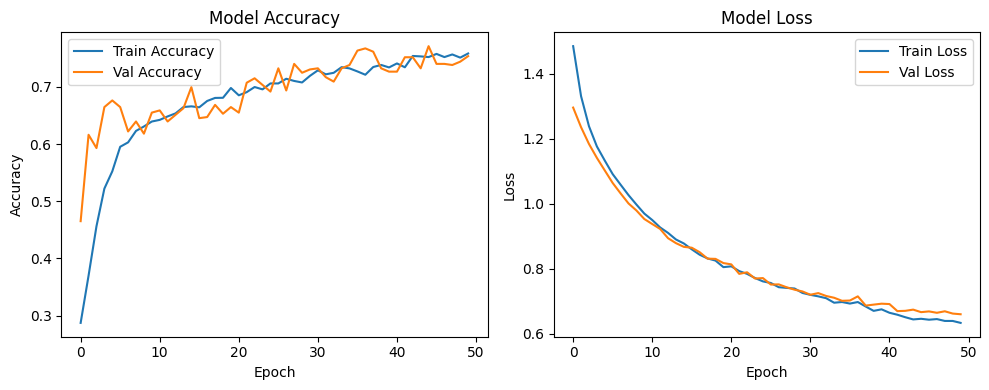

In [28]:

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()


17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 331ms/step


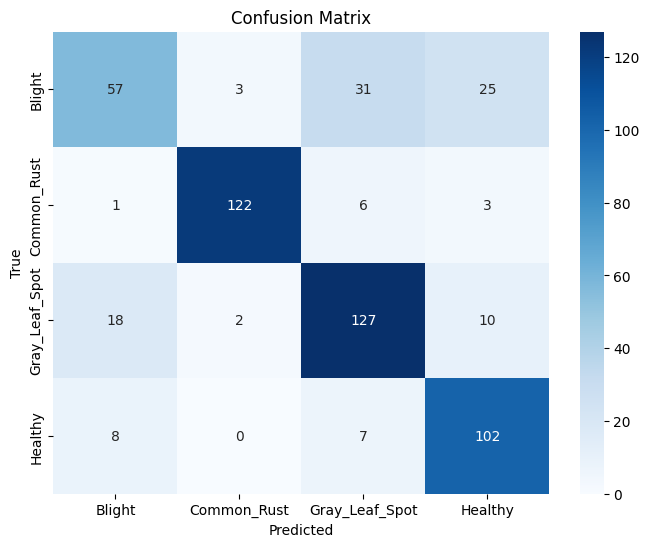


Classification Report:
                precision    recall  f1-score   support

        Blight       0.68      0.49      0.57       116
   Common_Rust       0.96      0.92      0.94       132
Gray_Leaf_Spot       0.74      0.81      0.77       157
       Healthy       0.73      0.87      0.79       117

      accuracy                           0.78       522
     macro avg       0.78      0.77      0.77       522
  weighted avg       0.78      0.78      0.78       522



In [29]:
y_true = test_gen.classes
y_pred_probs = model.predict(test_gen)
y_pred = np.argmax(y_pred_probs, axis=1)
# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
class_labels = list(test_gen.class_indices.keys())

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))


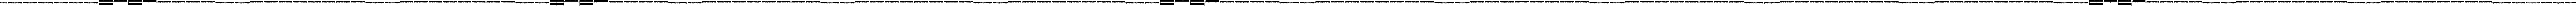

In [30]:
# =============================================================
# 🖼️ Plot ResNet‑50 Architecture (Horizontal)
# =============================================================
from tensorflow.keras.utils import plot_model
from IPython.display import Image

# 'model' is your compiled ResNet‑50 object
plot_model(
    model,
    to_file='resnet50_architecture.png',
    show_shapes=True,        # prints tensor dims
    show_layer_names=True,
    expand_nested=True,      # shows inner blocks clearly
    dpi=120,                 # resolution
    rankdir='LR'             # 'TB' for vertical, 'LR' for horizontal
)

# Display in‑notebook
Image(filename='resnet50_architecture.png')


In [31]:


# Save in TensorFlow SavedModel format
model.save("resnet50_saved_model.h5")


In [32]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 26,741,134 (102.01 MB)

 Trainable params: 1,051,140 (4.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

 Optimizer params: 2,102,282 (8.02 MB)


Class: Blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


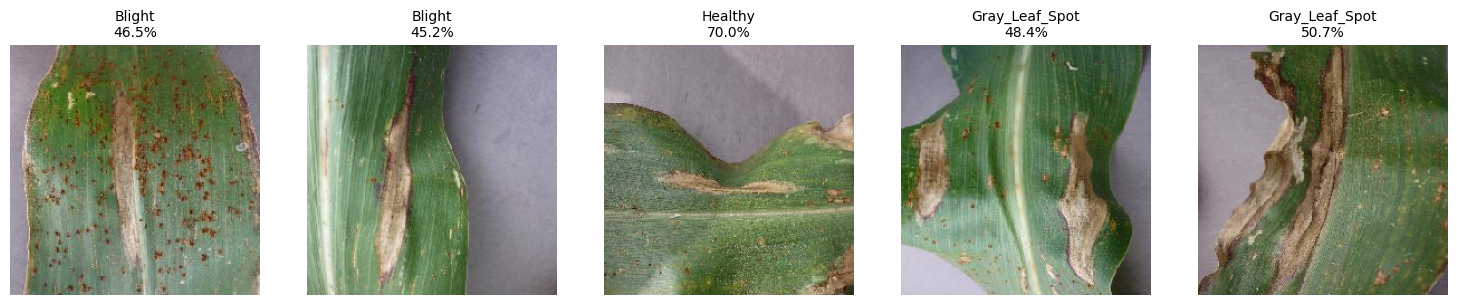


Class: Common_Rust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


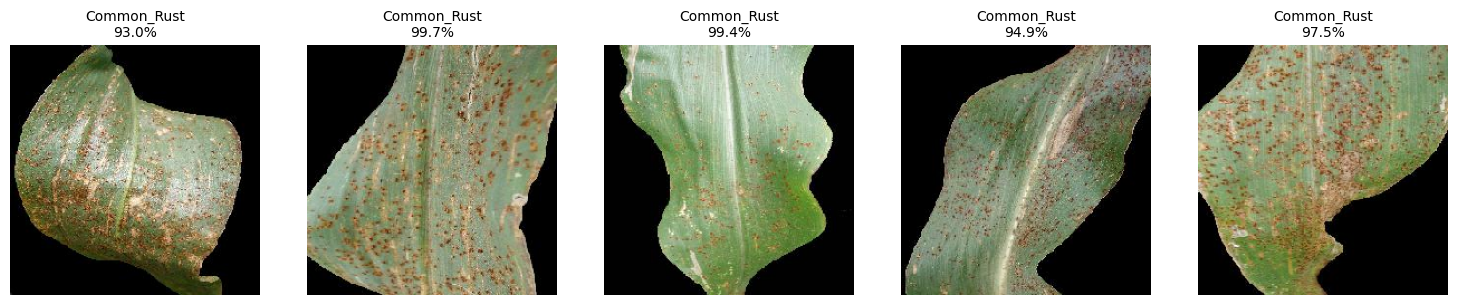


Class: Gray_Leaf_Spot
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


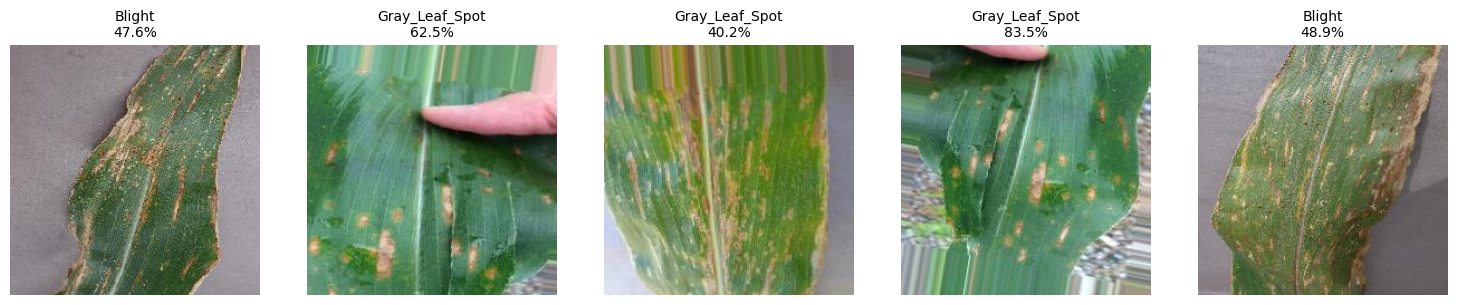


Class: Healthy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


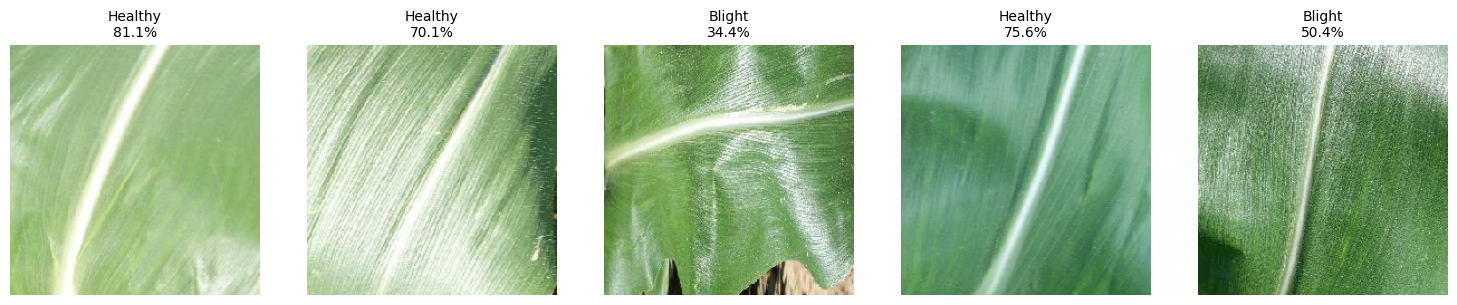

In [33]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Paths (change these if needed)
test_dir = '/kaggle/input/maize-leaf-dataset/split_dataset/test'    # Your test dataset folder
model_path = 'resnet50_saved_model.h5'            # Your trained model

# Load the model
model = load_model(model_path)

# Image size
img_size = (224, 224)

# Get class names from test folder
class_names = sorted(os.listdir(test_dir))

# Go through each class
for class_name in class_names:
    class_path = os.path.join(test_dir, class_name)
    image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('jpg', 'jpeg', 'png'))]
    selected_images = random.sample(image_files, 5)  # Pick 5 random images

    print(f"\nClass: {class_name}")
    plt.figure(figsize=(15, 3))

    for i, img_file in enumerate(selected_images):
        img_path = os.path.join(class_path, img_file)
        img = load_img(img_path, target_size=img_size)
        img_array = img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        # Predict
        prediction = model.predict(img_array)
        pred_class = class_names[np.argmax(prediction)]
        confidence = np.max(prediction) * 100

        # Show image and prediction
        plt.subplot(1, 5, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f'{pred_class}\n{confidence:.1f}%', fontsize=10)

    plt.tight_layout()
    plt.show()
